# Lab 0: PyTorch Primer

We'll use Python and [PyTorch](https://pytorch.org/) for the labs in this course. This lab is to help you get up to speed. It will introduce:
- **Tensors**: PyTorch's equivalent of NumPy arrays, but with more bells and whistles for running on GPUs and supporting automatic differentiation.
- **Broadcasting and Fancy Indexing**: If you're coming from Matlab or NumPy, you probably know that you can avoid costly for-loops by broadcasting computation over dimensions of an array (here, tensor) and using fancy indexing tricks. 
- **Distributions**: PyTorch has an excellent library of distributions for sampling, evaluating log probabilities, and much more. 

We'll introduce these concepts in the context of the Poisson mixture model from class (c.f. [Probabilistic Modeling](../lectures/02_probabilistic_modeling.ipynb)).

In [67]:
import torch
import torch.distributions as dist
import matplotlib.pyplot as plt

## 1. Constructing Tensors

Tensors are PyTorch's equivalent of NumPy arrays. The PyTorch documentation already has a [great tutorial](https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) on tensors. Rather than recreate the wheel, please start by reading that.

Once you've read through that, try using torch functions like `arange`, `reshape`, etc. to construct the following tensors.

### Problem 1.1

Construct the following tensor:

```
tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])
```

_Note: For this problems and the ones below, don't literally construct the tensor from the specified list. Use torch functions._

---

In [3]:
# YOUR CODE HERE

tensor([[0, 1, 2],
        [3, 4, 5],
        [6, 7, 8]])

### Problem 1.2

Construct the following tensor:

```
tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])
```

---

In [4]:
# YOUR CODE HERE

tensor([[0, 3, 6],
        [1, 4, 7],
        [2, 5, 8]])

### Problem 1.3

Construct the following tensor:

```
tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])
```

_Note: Here the sequence is repeated 3 times. Does your code support arbitrary numbers of repeats?_

---

In [30]:
# YOUR CODE HERE

tensor([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

### Problem 1.4

Construct the following tensor:

```
tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])
```

---

In [31]:
# YOUR CODE HERE

tensor([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]])

### Problem 1.5

Construct the following tensor:

```
tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])
```

---

In [32]:
# YOUR CODE HERE

tensor([[ 1., -2.,  0.,  0.],
        [-2.,  1., -2.,  0.],
        [ 0., -2.,  1., -2.],
        [ 0.,  0., -2.,  1.]])

### Problem 1.6

Construct the following tensor:

```
tensor([[[[0, 1, 2]]]])
```

---

In [35]:
# YOUR CODE HERE

tensor([[[[0, 1, 2]]]])

## 2. Broadcasting and Fancy Indexing

Your life will be much easier and your code will be much faster once you get the hang of broadcasting and indexing. Start by reading the  [PyTorch documentation](https://pytorch.org/docs/stable/notes/broadcasting.html).

### Problem 2.1

Construct a tensor `X` where `X[i,j] = i + j` by broadcasting a sum of two 1-dimensional tensors.

For example, broadcast a sum to construct the following tensor, 

```
tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])
```        

---

In [37]:
# YOUR CODE HERE

tensor([[0, 1, 2],
        [1, 2, 3],
        [2, 3, 4],
        [3, 4, 5]])

### Problem 2.2

Compute a distance matrix `D` where `D[i,j]` is the Euclidean distance between `X[i]` and `X[j]`, with

```
X = torch.arange(10, dtype=float).reshape(5, 2)
```

Your answer should be,

```
tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]])
```        

---

In [43]:
X = torch.arange(10, dtype=float).reshape(5, 2)
# YOUR CODE HERE

tensor([[ 0.0000,  2.8284,  5.6569,  8.4853, 11.3137],
        [ 2.8284,  0.0000,  2.8284,  5.6569,  8.4853],
        [ 5.6569,  2.8284,  0.0000,  2.8284,  5.6569],
        [ 8.4853,  5.6569,  2.8284,  0.0000,  2.8284],
        [11.3137,  8.4853,  5.6569,  2.8284,  0.0000]], dtype=torch.float64)

### Problem 2.3 

Extract the submatrix of rows `[2,3]` and columns `[0,1,4]` of the tensor,
```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be,
```
tensor([[10, 11, 14],
        [15, 16, 19]])
```

---

In [48]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE

tensor([[10, 11, 14],
        [15, 16, 19]])

### Problem 2.4

Create a binary mask matrix `M` of the same shape as `A` where `M[i,j]` is True if and only if `A[i,j]` is divisible by 7. Let

```
A = torch.arange(25).reshape(5, 5)
```

Your answer should be 

```
tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])
```

---

In [49]:
A = torch.arange(25).reshape(5, 5)
# YOUR CODE HERE

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True],
        [False, False, False, False, False],
        [False,  True, False, False, False]])

### Problem 2.5

Add one to the entries in `A` that are divisible by 7. After updating in place, `A` should be,

```
tensor([[ 1,  1,  2,  3,  4],
        [ 5,  6,  8,  8,  9],
        [10, 11, 12, 13, 15],
        [15, 16, 17, 18, 19],
        [20, 22, 22, 23, 24]])
```

---

In [50]:
# YOUR CODE HERE

## 3. Distributions

PyTorch has an excellent library of distributions in `torch.distributions`. Read the docs [here](https://pytorch.org/docs/stable/distributions.html).

We will use these distribution objects to construct and fit a Poisson mixture model.

### Problem 3.1

Draw 50 samples from a Poisson distribution with rate 10.

---

In [54]:
# YOUR CODE HERE

tensor([ 9.,  9.,  6.,  9.,  9., 13.,  8., 10., 19., 11.,  5., 12.,  7.,  8.,
        11., 13., 15., 12., 11., 14., 12.,  9., 12., 10., 10.,  7.,  9.,  8.,
         7., 11., 15., 13.,  8.,  7.,  3., 17.,  6., 16.,  9., 10., 13.,  9.,
        13., 17., 15.,  6., 11.,  9.,  7., 14.])

### Problem 3.2

One of the awesome thing about PyTorch distributions is that they support broadcasting too. 

Construct a matrix `P` where `P[i,j]` equals $\mathrm{Pois}(x=j; \lambda=i)$ for $i=0,\ldots,4$ and $j=0,\ldots,4$.

Your answer should be,
```
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])
```

---

In [59]:
# YOUR CODE HERE

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3679, 0.3679, 0.1839, 0.0613, 0.0153],
        [0.1353, 0.2707, 0.2707, 0.1804, 0.0902],
        [0.0498, 0.1494, 0.2240, 0.2240, 0.1680],
        [0.0183, 0.0733, 0.1465, 0.1954, 0.1954]])

### Problem 3.3

Evaluate the log probability of the points `[1.5, 3., 4.2]` under a gamma distribution with shape (aka concentration) 2.0 and inverse scale (aka rate) 1.5.

Your answer should be,

```
tensor([-1.0336, -2.5905, -4.0540])
```

---

In [63]:
# YOUR CODE HERE

tensor([-1.0336, -2.5905, -4.0540])

### Problem 3.4

Draw 1000 samples from a Poisson mixture model,

$$
\begin{align*}
p(x) &= \frac{1}{2} \mathrm{Pois}(10.0) + \frac{1}{2} \mathrm{Pois}(2.0)
\end{align*}
$$

Use `matplotlib.pyplot.hist` to plot a normalized histogram of the samples.

---

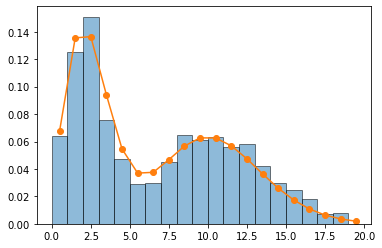

In [81]:
# YOUR CODE HERE
# data = ...

## MAP estimation

### Problem 4.1

Let `xs` be the samples from above (you should have `xs.shape = (1000,)`). Assume there are $K = 2$ clusters and the prior cluster probabilities $[\tfrac{1}{2}, \tfrac{1}{2}]$ are known. Complete the code below to perform MAP estimation.

---


estimated rates: tensor([10.6110,  2.0041])


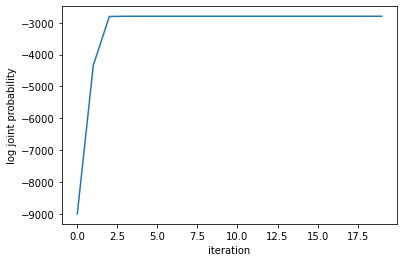

In [88]:
def update_assignments(data, rates, probs):
    """Update the cluster assignments ($z$) given the data, rates, 
    and cluster probabilities.

    Args:
        data: shape `(N,)` tensor of counts
        rates: shape `(K,)` tensor of nonnegative rates for each cluster.
        probs: shape `(K,)` tensor of cluster probabilities
        
    Returns:
        assignments: shape `(N,)` tensor of integer cluster assignments
    """
    ##
    # YOUR CODE HERE
    ##
    return assignments

def update_rates(data, assignments, shape=1.0, inv_scale=1.0):
    """Update the rates for each cluster under a gamma prior.

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.
        
    Returns:
        rates: shape `(K,)` tensor of updated rates for each cluster
    """
    ##
    # YOUR CODE HERE
    ##
    return rates
    

def log_joint(data, assignments, rates, probs, shape=1.0, inv_scale=1.0):
    """_summary_

    Args:
        data: shape `(N,)` tensor of counts
        assignments: shape `(N,)` tensor of integer cluster assignments
        rates: shape `(K,)` tensor of updated rates for each cluster
        probs: shape `(K,)` tensor of cluster probabilities
        shape: shape (aka concentration) of gamma prior. Defaults to 1.0.
        inv_scale: inverse scale (aka rate) of gamma prior. Defaults to 1.0.
        
    Returns:
        lp: scalar log joint probability under the mixture model
    """
    ###
    # YOUR CODE HERE
    ##
    return lp
    
# Run coordinate ascent for some number of iterations, starting
# with random cluster assignments
probs = torch.ones(2) / 2.0
assignments = torch.randint(0, 2, data.shape)
rates = 10 * torch.rand(2)

lps = []
for i in range(20):
    lps.append(log_joint(data, assignments, rates, probs))
    rates = update_rates(data, assignments)
    assignments = update_assignments(data, rates, probs)
    
plt.plot(lps)
plt.xlabel("iteration")
plt.ylabel("log joint probability")

print("estimated rates:", rates)

### Problem 4.2 (Bonus)

Now consider a more general model in which 

$$
z_n \sim \mathrm{Cat}(\boldsymbol{\pi})
$$

where the prior cluster probabilities $\boldsymbol{\pi}$ are unknown. (Above, we assumed they were known to be $\boldsymbol{\pi} = [\tfrac{1}{2}, \tfrac{1}{2}]$.) Derive and implement a coordinate ascent algorithm for MAP estimation of $\mathbf{z}_{\mathsf{MAP}}$, $\boldsymbol{\lambda}_{\mathsf{MAP}}$, and $\boldsymbol{\pi}_{\mathsf{MAP}}$.
